In [2]:
import openmc

In [1]:
openmc.run(openmc_exec="/Users/lindad/projects/Okapi/openmc/build/bin/openmc")


                               %%%%%%%%%%%%%%%
                          %%%%%%%%%%%%%%%%%%%%%%%%
                       %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                     %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                  %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                   %%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                ###############      %%%%%%%%%%%%%%%%%%%%%%%%
               ##################     %%%%%%%%%%%%%%%%%%%%%%%
               ###################     %%%%%%%%%%%%%%%%%%%%%%%
               ####################     %%%%%%%%%%%%%%%%%%%%%%
               #####################     %%%%%%%%%%%%%%%%%%%%%
               ######################     %%%%%%%%%%%%%%%%%%%%
               #######################     %%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%

In [48]:
import numpy as np

In [52]:
import matplotlib.pyplot as plt
%matplotlib inline

In [55]:
with openmc.StatePoint('statepoint.20.h5') as sp:
    print(sp.n_realizations)
    print(sp.n_batches)

10
20


In [57]:
3.2e7 / 60

533333.3333333334

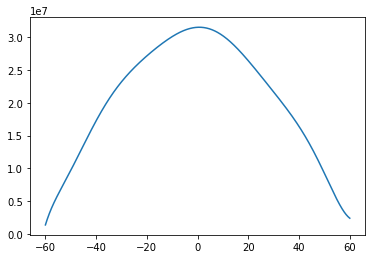

In [59]:
with openmc.StatePoint('statepoint.20.h5') as sp:
    tallies = sp.tallies

flux = tallies[1].get_slice(scores=['kappa-fission'])

flux.mean.shape = (11)

order = 10
n = np.arange(order + 1)
a_n = (2*n + 1)/2 * flux.mean

phi = np.polynomial.Legendre(a_n, domain=(-60, 60))

z = np.linspace(-60, 60, 1000)
plt.plot(z, phi(z))

In [44]:
np.trapz(phi(z), z)

106.48702210802489

In [27]:
mesh_flux = tallies[2].get_slice(scores=['flux'])

In [30]:
mesh_flux.mean.shape = (100, 100)

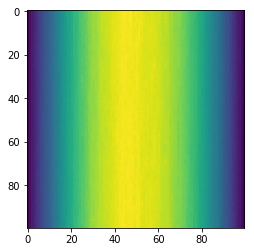

In [31]:
fig = plt.subplot(111)
fig.imshow(mesh_flux.mean)